<a href="https://colab.research.google.com/github/liliana723/DataScience/blob/master/PREDICCIONDIABETES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESARROLLO DE UN MODELO PREDICTIVO DE LA DIABETES TIPO 2

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
from IPython.display import display

%matplotlib inline

path_file="/content/drive/MyDrive/diabetes.csv"

Mounted at /content/drive/


MOSTRAR DATOS

In [2]:
df=pd.read_csv(path_file)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


ANALISIS DE DATOS

In [3]:
#total de numeros de columnas
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Para saber más sobre el conjunto de datos
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Para saber más sobre el conjunto de datos con transposición
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
#Comprobando si hay algún valor nulo o no
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [8]:
#Comprobando si hay algún valor nulo o no
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


En estas columnas, un valor de cero no tiene sentido y, por lo tanto, indica un valor faltante.
Las siguientes columnas o variables tienen un valor de cero no válido: glucosa, presión arterial, grosor de la piel, insulina, IMC. Es mejor reemplazar los ceros con NAN, ya que después de eso, contarlos sería más fácil y los ceros deben reemplazarse con valores adecuados.

In [9]:
df = pd.read_csv(path_file)  # Recarga el DataFrame si es necesario
df.head()
df_copia = df.copy(deep=True)  # Crea una copia y asigna a un nombre de variable diferente
df_copia[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copia[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
## Mostrando el recuento de NAN
print(df_copia.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


VISUALIZACION DE DATOS
Histogram plot

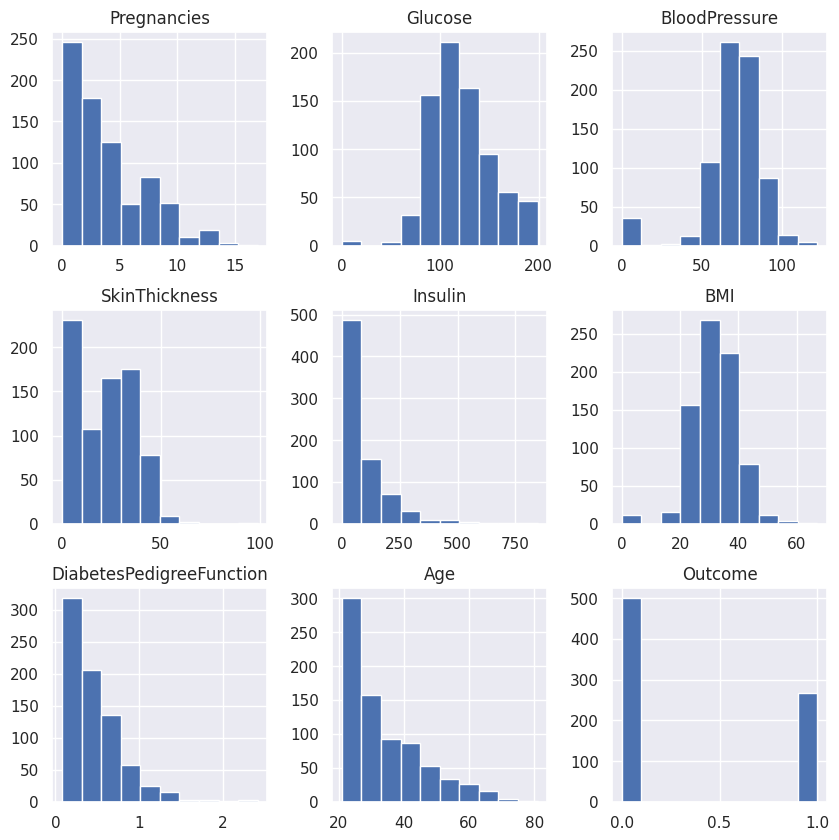

In [10]:
#Gráficos de distribución de datos
p = df.hist(figsize=(10, 10))

In [11]:
#con el objetivo de imputar valores NAN para las columnas de acuerdo con su distribución
df_copia['Glucose'].fillna(df_copia['Glucose'].mean(), inplace=True)
df_copia['BloodPressure'].fillna(df_copia['BloodPressure'].mean(), inplace=True)
df_copia['SkinThickness'].fillna(df_copia['SkinThickness'].median(), inplace=True)
df_copia['Insulin'].fillna(df_copia['Insulin'].median(), inplace=True)
df_copia['BMI'].fillna(df_copia['BMI'].median(), inplace=True)


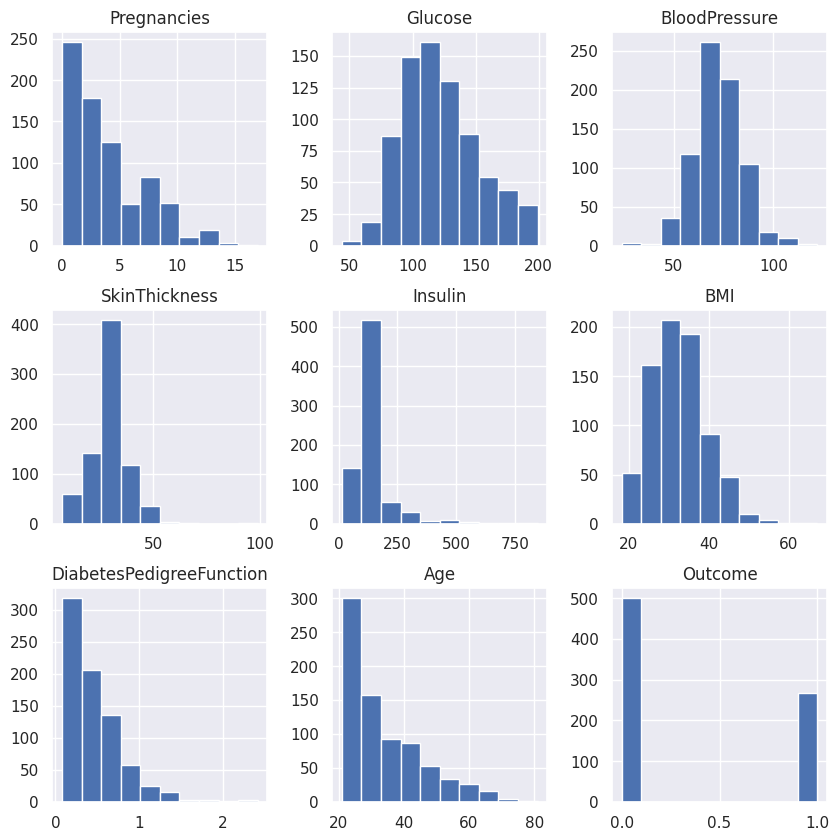

In [12]:
p = df_copia.hist(figsize=(10, 10))

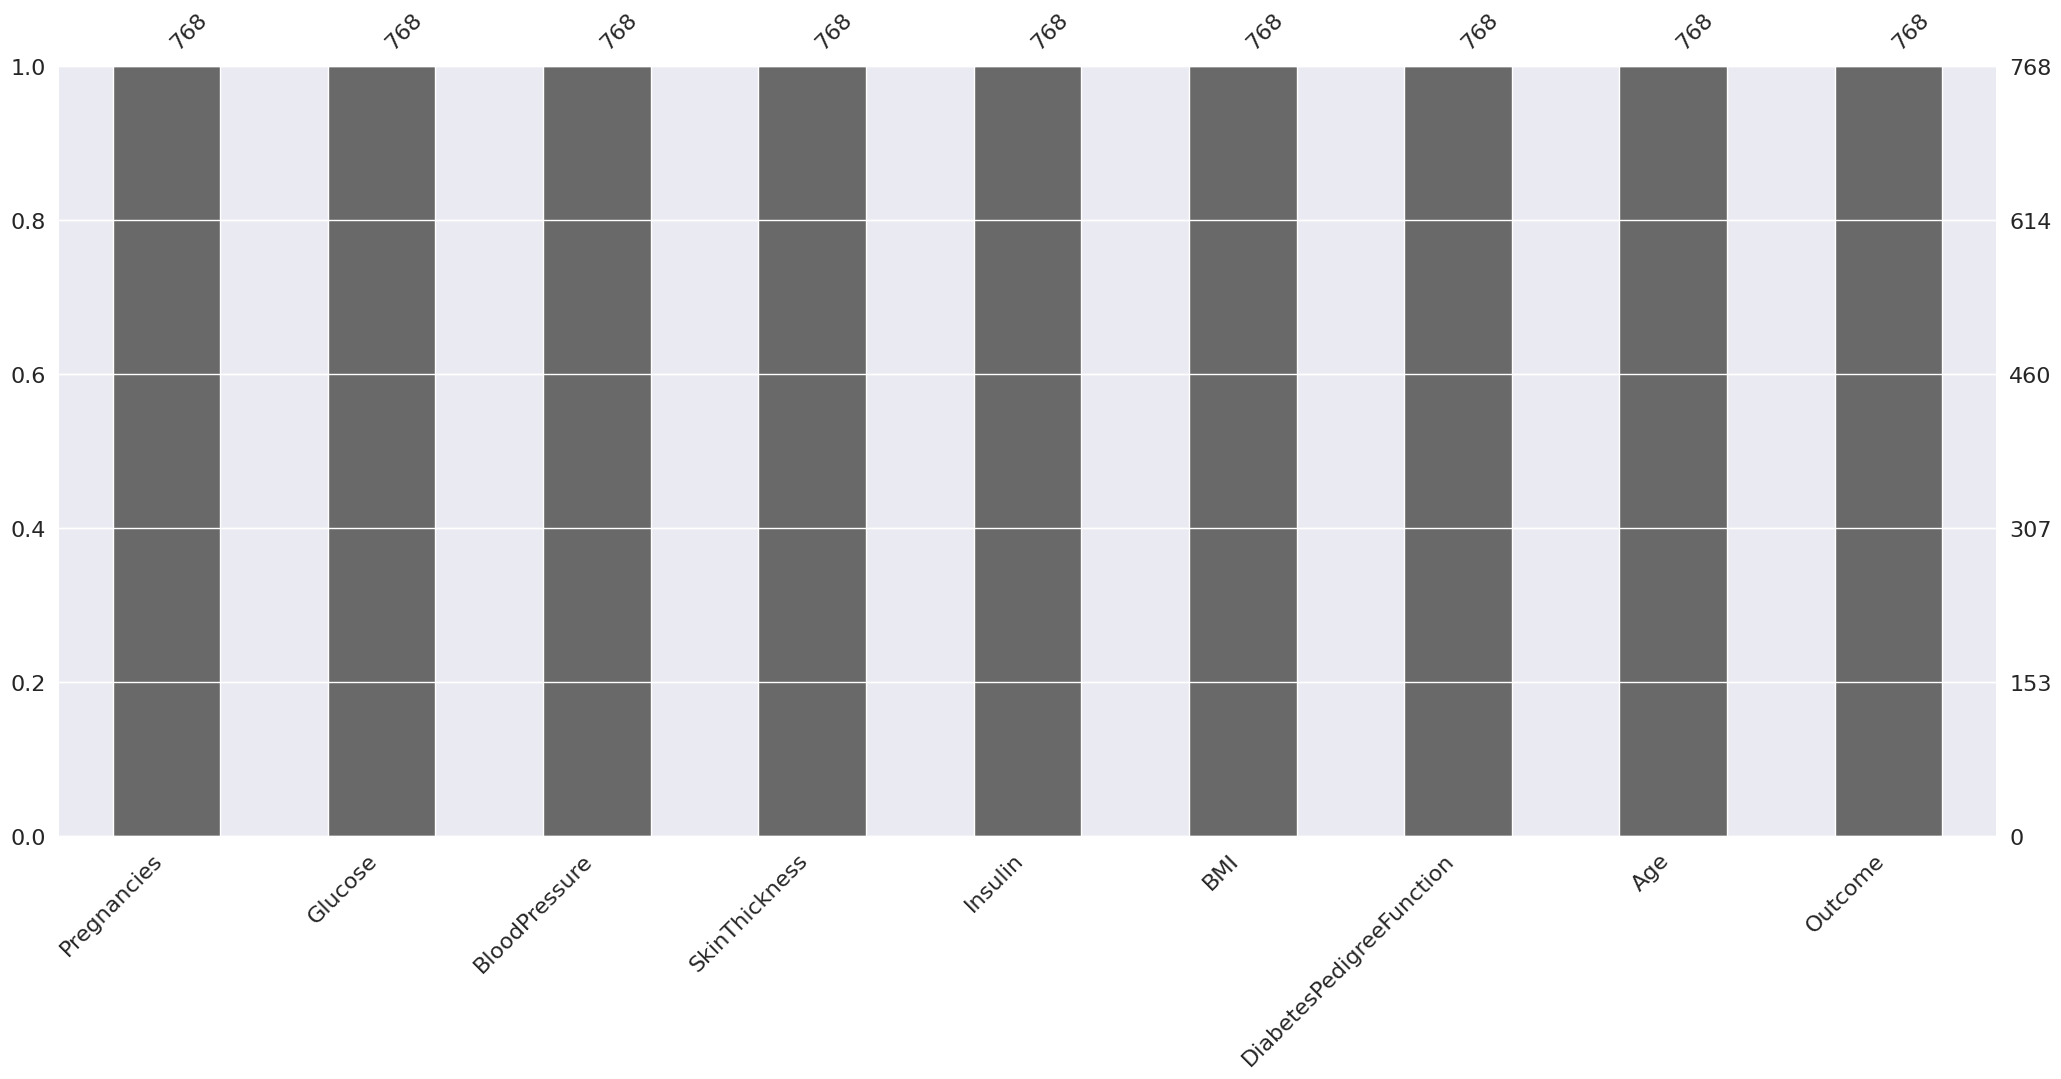

In [13]:
#plotting null count analysis plot
p = msno.bar(df_copia)


Outcome
0    500
1    268
Name: count, dtype: int64


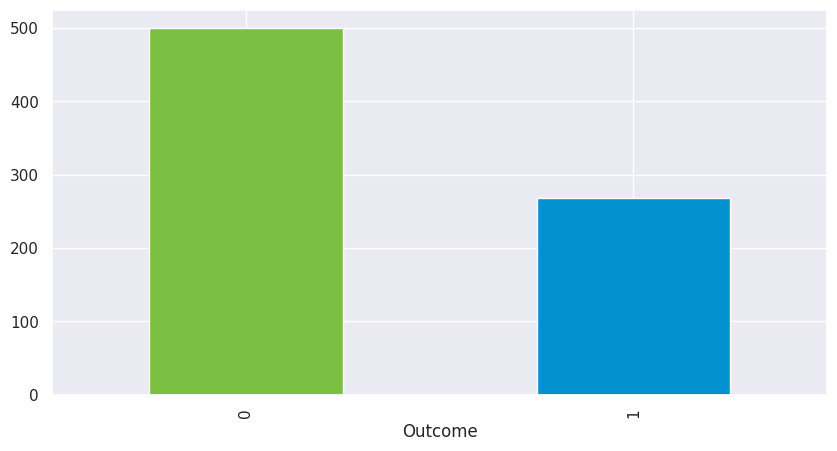

In [14]:
#comprobar el equilibrio de los datos trazando el recuento de resultados por sus valores
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df_copia["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df_copia.Outcome.value_counts())
p = df_copia.Outcome.value_counts().plot(kind="bar", figsize=(10, 5), color=colors)

El gráfico anterior muestra que los datos están sesgados hacia los puntos de datos que tienen un valor de resultado de 0, lo que significa que la diabetes no estaba presente en realidad. El número de pacientes no diabéticos es casi el doble del número de pacientes diabéticos.

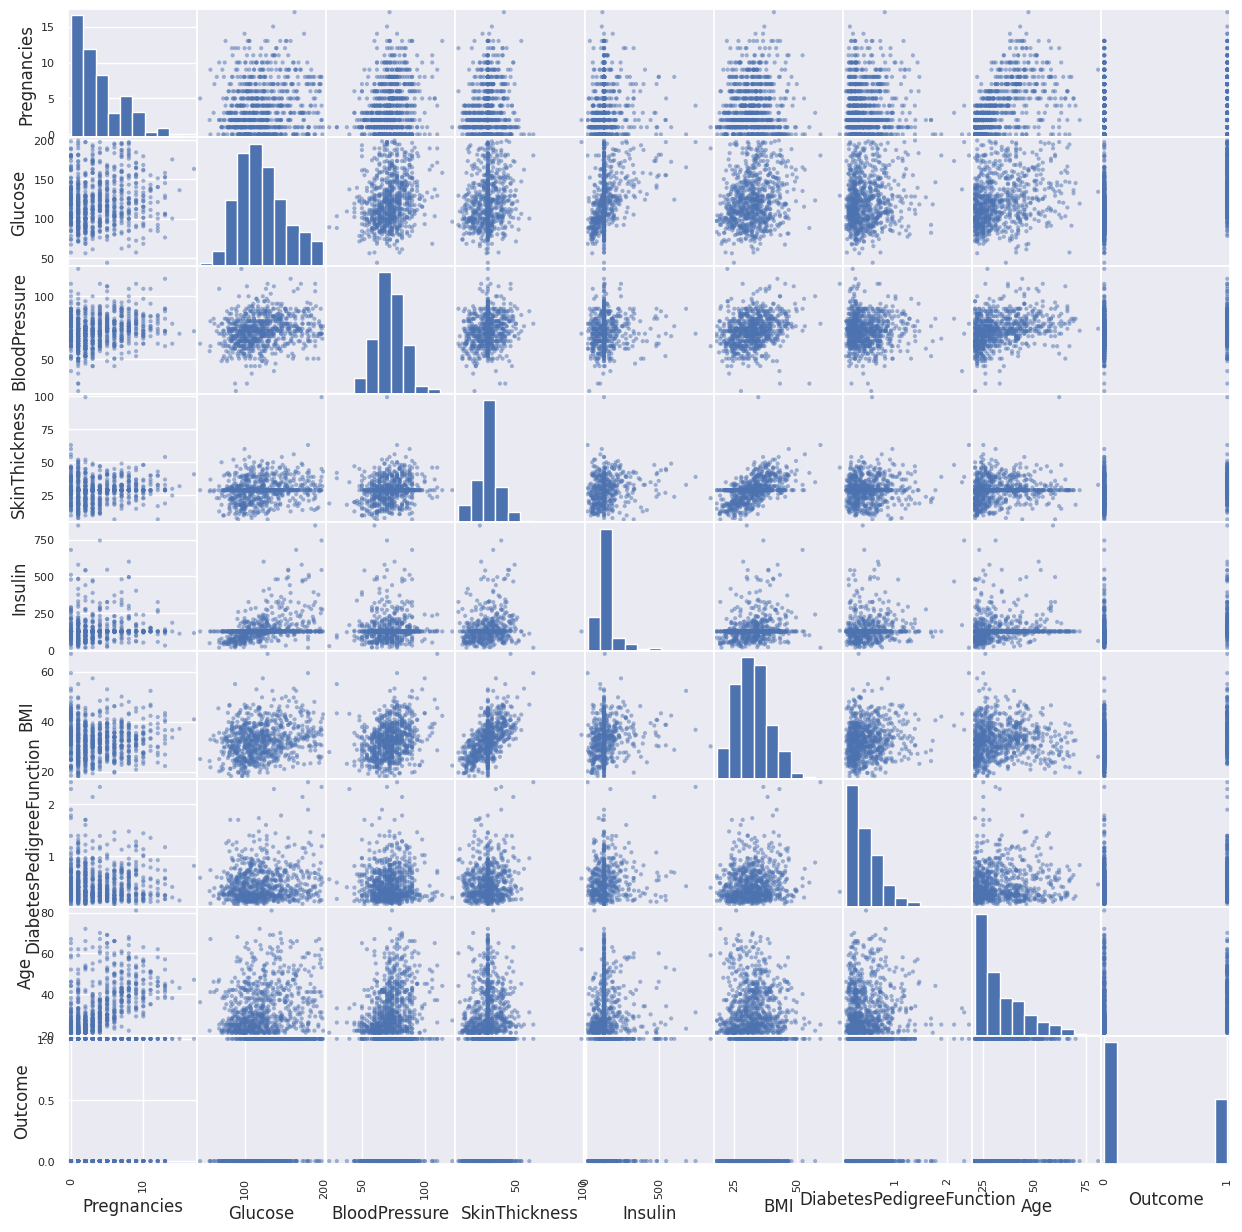

In [15]:
#plotting a scatter matrix of uncleaned data
p = pd.plotting.scatter_matrix(df_copia, figsize=(15, 15))

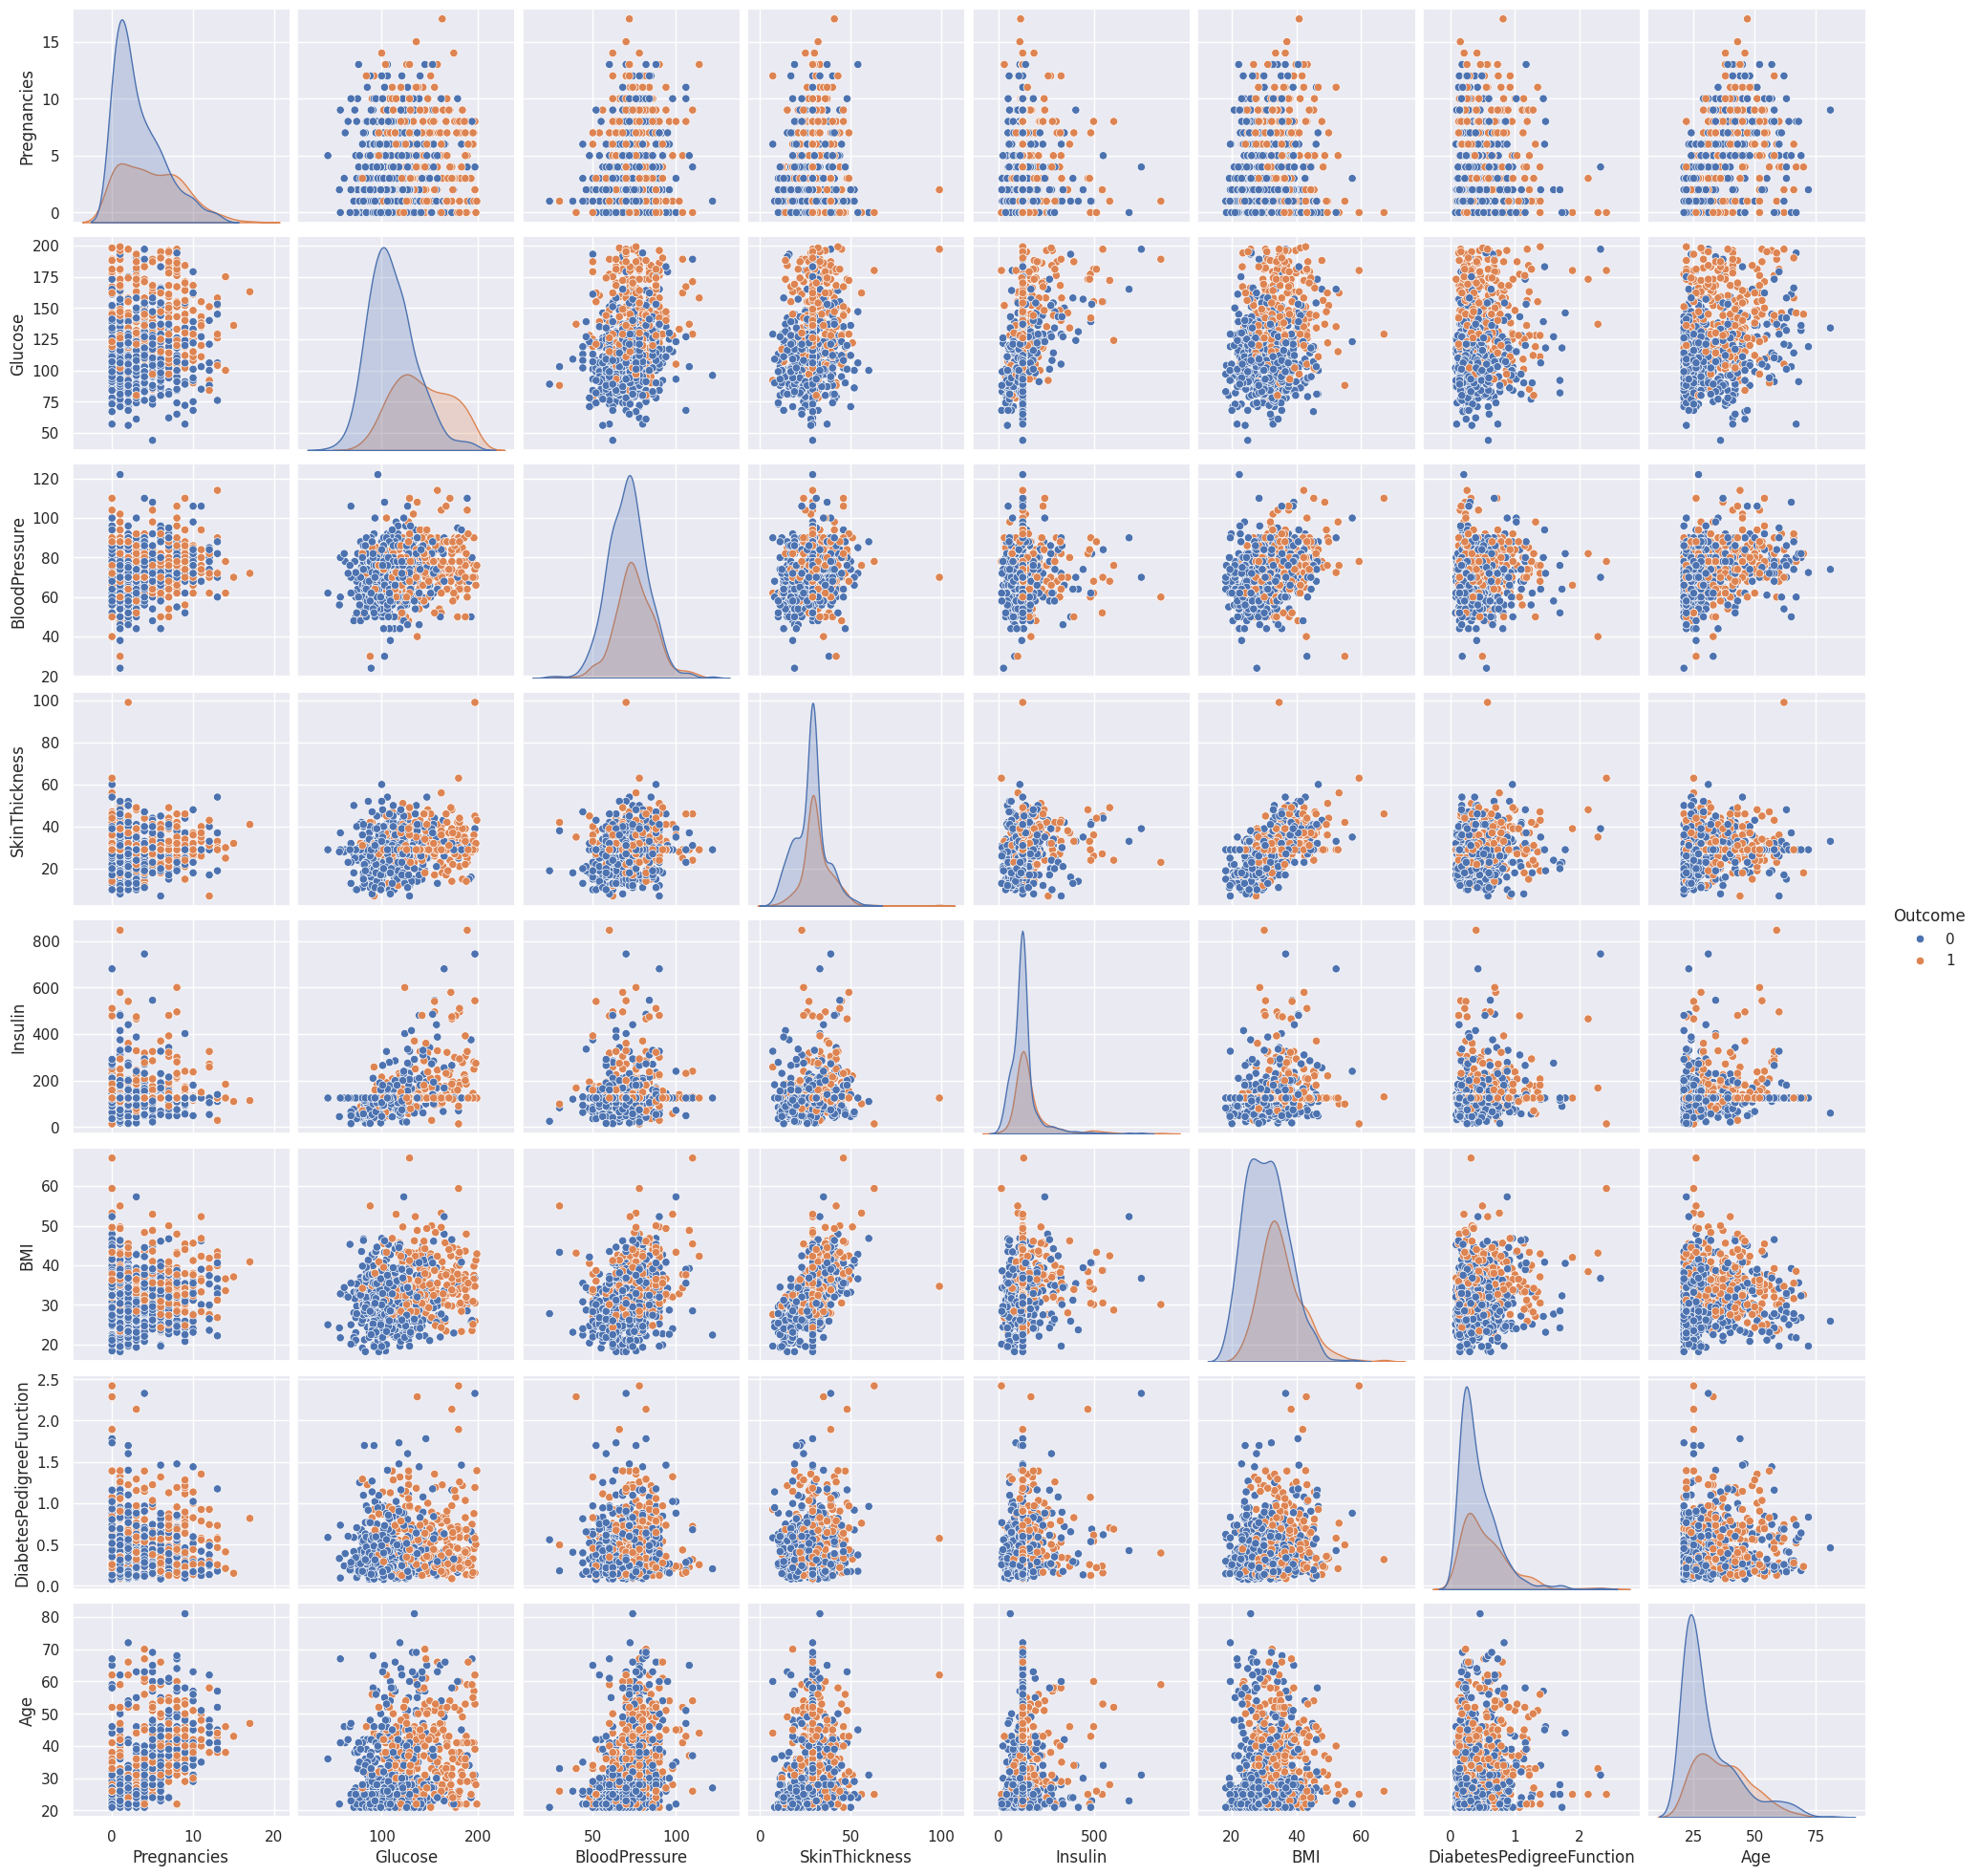

In [16]:
#plotting the pair plots for the data
p = sns.pairplot(df_copia, hue="Outcome")

CORRELACION ENTRE TODAS CARACTERISTICAS

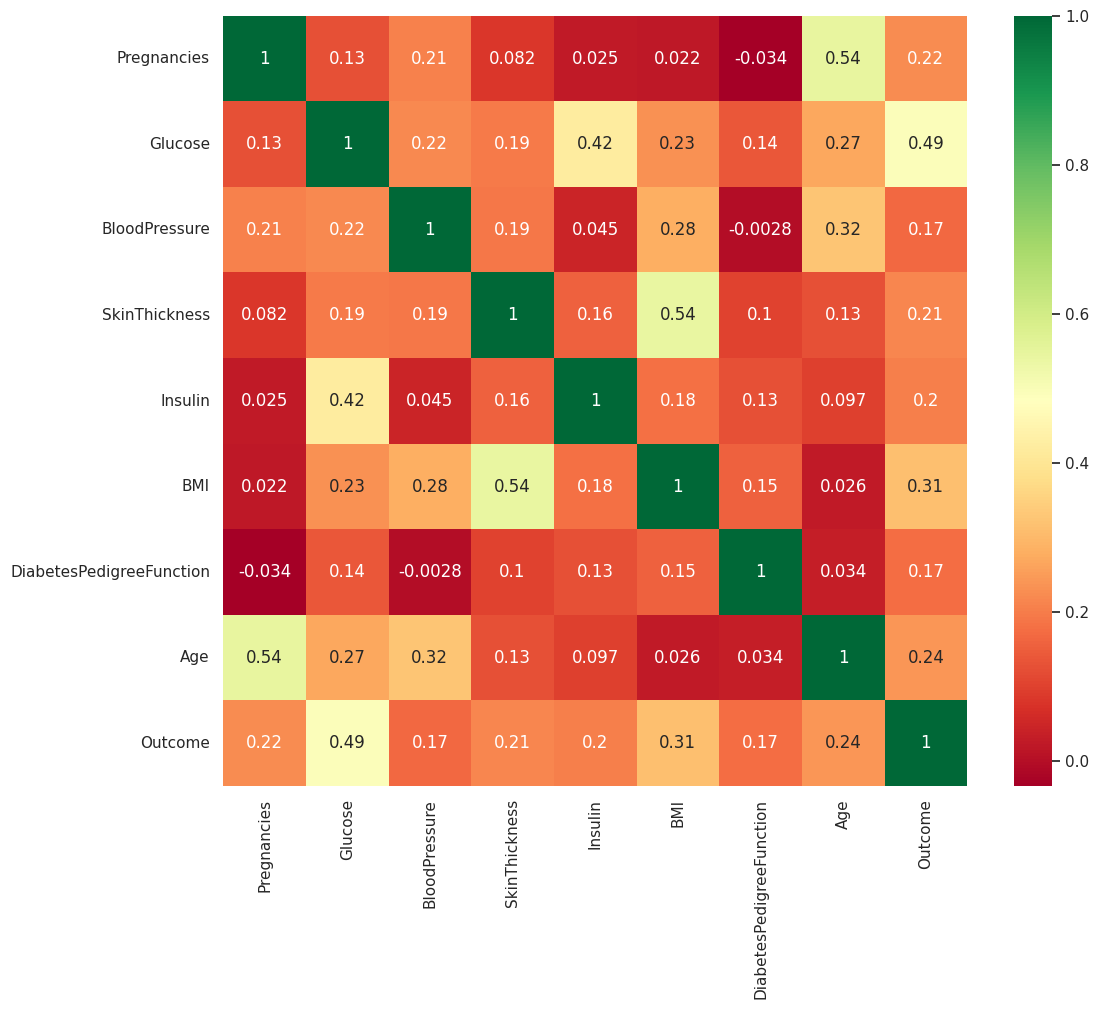

In [17]:
#correlstion between all the features after cleaning
plt.figure(figsize=(12, 10))
p = sns.heatmap(df_copia.corr(), annot=True, cmap="RdYlGn")

scaling the data

In [18]:
df_copia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
sc_X = StandardScaler() # Create a StandardScaler object
X = pd.DataFrame(sc_X.fit_transform(df_copia.drop(["Outcome"], axis=1)), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [20]:
y = df_copia.Outcome
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


Dividir los datos en entrenamiento y prueba.

In [21]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42, stratify=y)

Model Building
K-Nearest Neighbor(KNN)

In [22]:
test_scores = []
train_scores = []
for i in range(1,15):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train, y_train)
  train_scores.append(knn.score(X_train, y_train))
  test_scores.append(knn.score(x_test, y_test))


In [23]:
train_scores

[1.0,
 0.84375,
 0.8671875,
 0.8359375,
 0.828125,
 0.8046875,
 0.814453125,
 0.802734375,
 0.798828125,
 0.802734375,
 0.798828125,
 0.79296875,
 0.794921875,
 0.796875]

In [24]:
test_scores

[0.73046875,
 0.73046875,
 0.74609375,
 0.7421875,
 0.7421875,
 0.72265625,
 0.74609375,
 0.74609375,
 0.74609375,
 0.73046875,
 0.765625,
 0.734375,
 0.75,
 0.734375]

In [25]:
max_train_score = max(train_scores)
max_test_score_df = [i for i, v in enumerate(test_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, max_test_score_df)))) # Changed train_score_df to max_test_score_df

Max train score 100.0 % and k = []


Puntuación que proviene de las pruebas en los puntos de datos que se dividieron al principio para ser utilizados únicamente para pruebas.

In [26]:
max_test_score = max(test_scores)
max_test_score_df = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, max_test_score_df))))

Max test score 76.5625 % and k = [11]


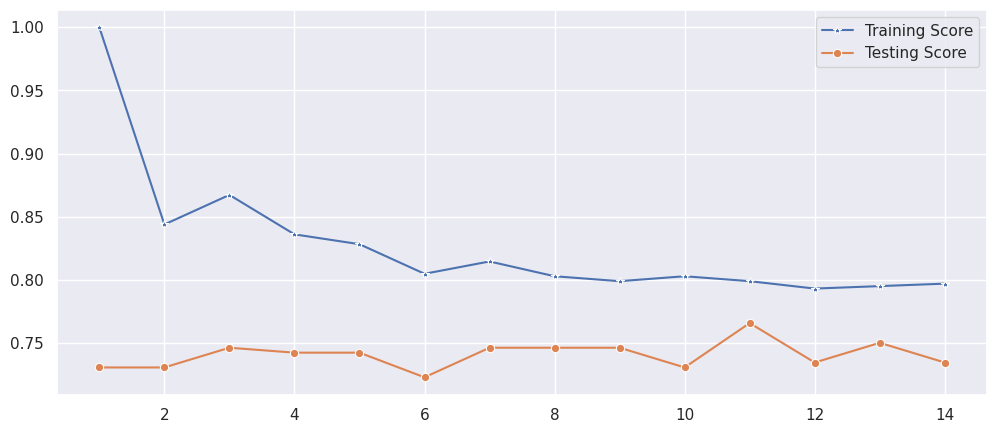

In [27]:
plt.figure(figsize=(12,5))
p = sns.lineplot(x=range(1,15), y=train_scores, marker='*', label='Training Score')
p = sns.lineplot(x=range(1,15), y=test_scores, marker='o', label='Testing Score')

El mejor resultado se captura en k = 11, por lo tanto, se utiliza 11 para el modelo final.

In [28]:
knn = KNeighborsClassifier(11)
knn.fit(X_train, y_train)
knn.score(x_test, y_test)

0.765625

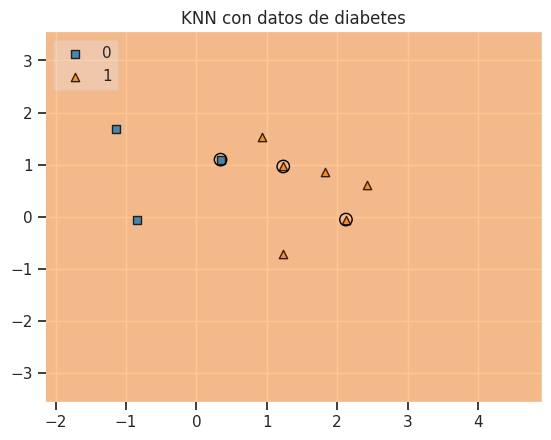

In [29]:
#Graficar el límite de decisión
value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2,
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3:width,  4:width,  5: width, 6: width, 7:width},
                      X_highlight=x_test.values)
plt.title('KNN con datos de diabetes')
plt.show()

Confusion Matrix

Text(0.5, 19.049999999999997, 'Predicted label')

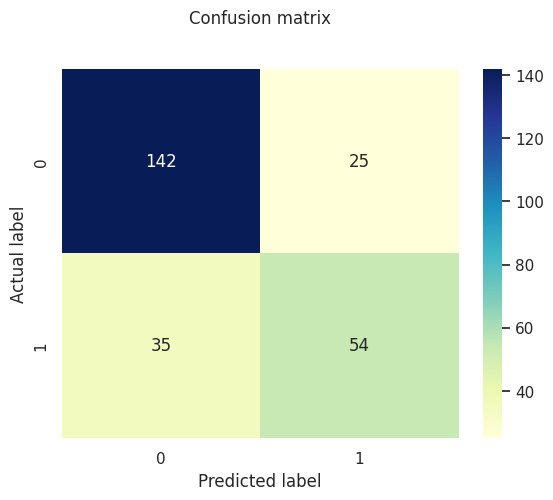

In [30]:
y_pred = knn.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
#classification reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       167
           1       0.68      0.61      0.64        89

    accuracy                           0.77       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.77      0.76       256



ROC-AUC CURVE

In [32]:
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

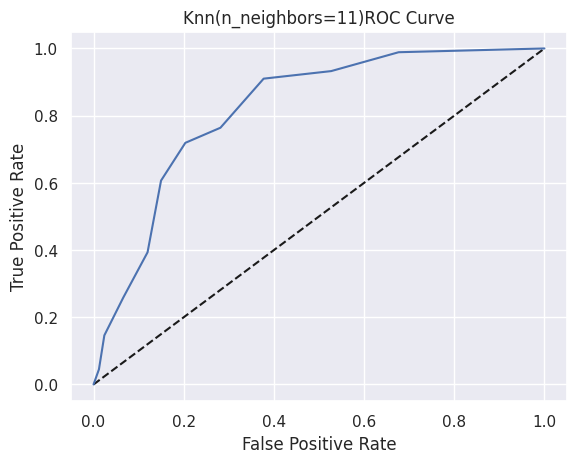

In [33]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn(n_neighbors=11)ROC Curve')
plt.show()

In [34]:
roc_auc_score(y_test, y_pred_proba)


0.8193500639171096

implementing GridSearchCV

In [35]:
# en el caso de un clasificador como KNN el parámetro a ajustar es n_neighbors
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Params: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Params: {'n_neighbors': 25}


In [36]:
roc_auc_score(y_test, y_pred_proba)

0.8193500639171096